# Simple Linear Regression: Review (Part-1)

Simple Linear Regression is correlation between two variables, for example (X and Y).  In traditional statistics, X is called independent or predictor variable and Y is designated as a dependent variable.  In machine learning X is commonly called attribute/feature, whereas Y is labeled as the target variable. 

Part-1, the current review, analyzes a relation between highway-mpg and car price, which is associated with a negative numerical value. In Part-2, Multiple Linear Regressions and Polynomial Regressions will be illustrated. Data used for the analysis is provided by IBM. 


In [1]:
# Let us import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# ulr of data 

url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(url)

df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
#Let us designate the attribute with X1 and target with y

X1 = df[['highway-mpg']]
y = df['price']

from sklearn.linear_model import LinearRegression

#Create Object and fit

lm = LinearRegression()

lm.fit(X1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
#Predict y-hat, which is car price
y_hat = lm.predict(X1)
y_hat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

###### Coefficient Correlatio-Slope

Notice, coefficient correlation (r) and slope of a regression line are very related, but they are not the same. The value of r and slope can be only equal if independent variables have the same std. deviation. The formula for the slope of a regression line is:  Slope = r(sy/sx)

On the other hand, coefficient value in the form of array can be a large positive or negative, as shown below. This means, highway-mpg is associated with the reduction of the car price by $821.73.

In [4]:
# Coefficient
lm.coef_

array([-821.73337832])

In [5]:
#Interception: a constant price of the car when the attribute (X1) is zero.
lm.intercept_

38423.305858157386

**Mean Square Error(MSE)**: In traditional statistics, MSE is an important indicator of a model performance. MSE is difference between observed and expected values of target variable called a dependent variable. Now, let us calculate the MSE of the price and highway-mpg.

In [9]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_hat)
print('The mean square error, difference between observed price and predicted value is: ', mse)

The mean square error, difference between observed price and predicted value is:  31635042.944639895


**R-squared**: Another key statistical measure that can check the accuracy of a model is R2. It represents the percentage of a chane occured on a dependen variance in a response to a change on an independent variable in a regression model. R2 can be calculated as indicated here.

In [10]:
R2 = lm.score(X1, y)
print(R2)

0.4965911884339175


Finally, we can estimate the price prediction of the model using the equastion as follows, y_hat = 𝑎+𝑏X since our model is Simple Linear Regression, we do use the simple linear equation, not quadratic.

By plugging in the actual values, we can obtain the price of 38423.31 + 821.73 x highway-mpg, for instance, mpg at zero row,24th column (0,24) is 27 and produce price: 38423.31 + 821.73 x 27.

Notice, we can locate the position of column(price) by entering the following codes: **df.columns.get_loc("price")**. In this case, the output is 24, which is the 24th column.

## Model Assessment Via Visilization

To take the first look, how is the model performing, let us plot regression-line, residplot, and check mean-error for highway-mpg and price. For simplicity, I will use X and y instead of these variables.

**Regression Plot**: The plot provides a combination of both scattered data points and the fitted linear regression line crossing through the data. This plot give a reasonable estimate of the relationship between the two variables whether strong or week, or linear or not. The present regression plot indicates the inverse relation between the highway mpg and price. The former increase, while the latter decreases. The negatively relation is not the problem; its fitted line is slide down from the center in deviation from the desired linear relation.

(0, 48277.32436927914)

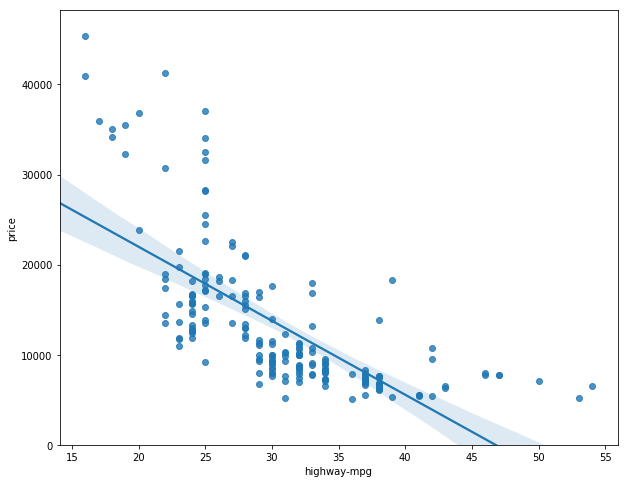

In [11]:
# Residual Plot

width = 10
height = 8
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0, )

**Residual Plot**: It is called the residual error. The residual error is actually the distance from the data point to the fitted regression line. Curving or clustering of the data points away from the fitted line or the zero zone is the indication of inappropriateness of the model for given dataset and the current residual plot has this trend.

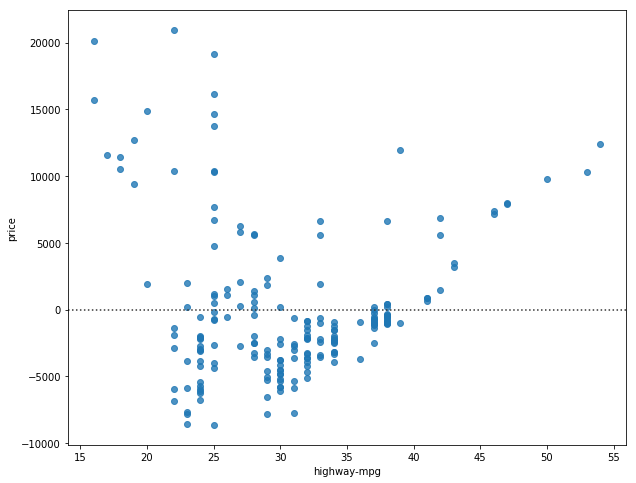

In [13]:
# The current Residual Plot looks this:

width = 10
height = 8
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

**Conclusion**: There is the moderate correlation (R_Square = 0.496) between the highway-mpg and car price. In contrary to public expectations, the highway-mpg and price has associated inversely. This is presumably, cars with high mpg are made economically with lower horsepower, less engine size and sold relatively in a cheaper price. Additional data is needed for the conformance of the same assumption (Multiple Regression models will be discussed in Part-2).